In [2]:
import time
import itertools
import os
from tqdm.notebook import tqdm

import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [4]:
colors = np.array(['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 
                   'limegreen'])

In [5]:
from sklearn.datasets import make_blobs

In [11]:
X, y = make_blobs(
    n_samples=1000, 
    centers=np.array([
        [1, 1], 
        [4, -1],
        [3, 5]
    ])
)

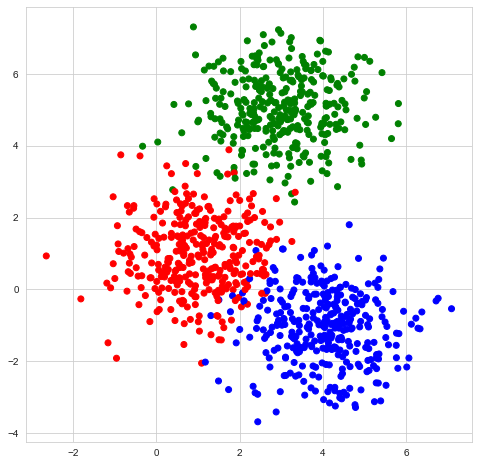

In [12]:
plt.scatter(X[:, 0], X[:, 1], color=colors[y]);

In [18]:
from sklearn.cluster import MiniBatchKMeans, KMeans

In [21]:
cluster = MiniBatchKMeans(n_clusters=5, n_init=50)
cluster.fit(X, y)

MiniBatchKMeans(n_clusters=5, n_init=50)

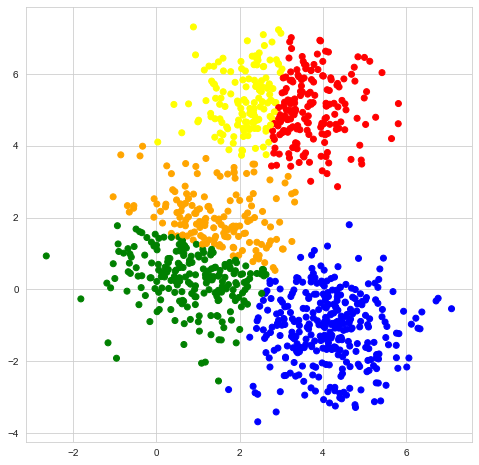

In [22]:
plt.scatter(X[:, 0], X[:, 1], color=colors[cluster.labels_]);

In [43]:
import time
from scipy.spatial.distance import cdist
from IPython.display import clear_output

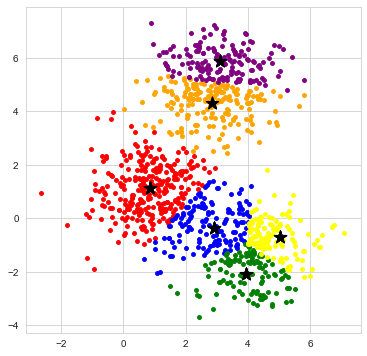

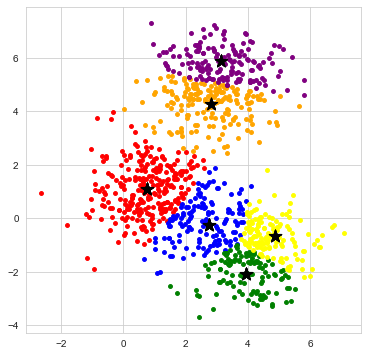

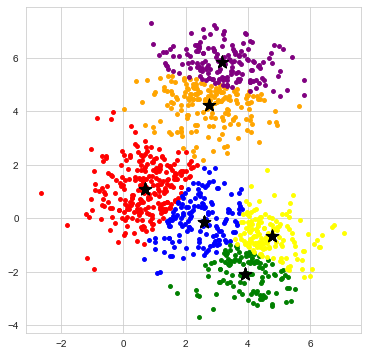

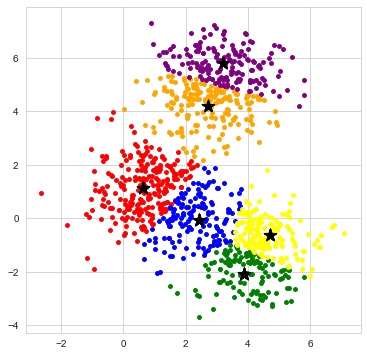

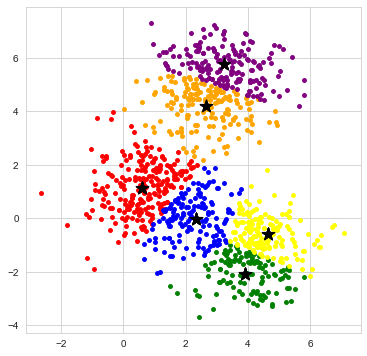

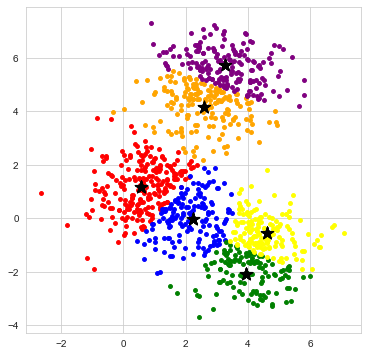

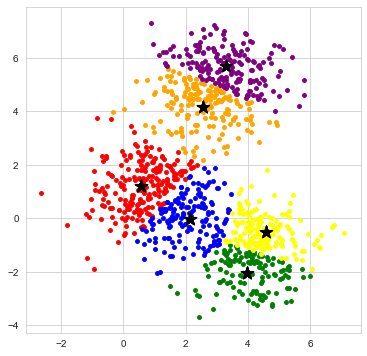

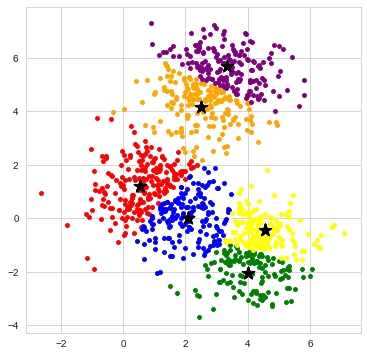

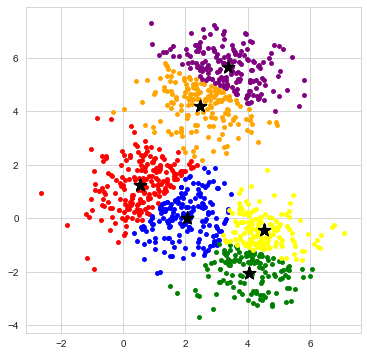

In [60]:
k = 6
centers = X[np.random.randint(0, len(X), size=k)]

arg_distances = np.argsort(cdist(XA=X, XB=centers, metric='euclidean'), axis=1)

clusters_dict = {
    i: X[arg_distances[:, 0] == i] for i in range(k)
}
iter_ = 0
max_iter = 20
centers_dist_history = [np.inf]

while iter_ < max_iter and centers_dist_history[-1] > 1e-1:
    new_centers = np.array([clusters_dict[i].mean(axis=0) for i in range(k)])
    
    arg_distances = np.argsort(cdist(XA=X, XB=new_centers, metric='euclidean'), axis=1)

    clusters_dict = {
        i: X[arg_distances[:, 0] == i] for i in range(k)
    }
    centers_dist_history.append(np.linalg.norm(centers - new_centers))
    centers = new_centers
    
    iter_ += 1
    plt.figure(figsize=(6, 6))
    for i in range(k):
        plt.scatter(clusters_dict[i][:, 0], clusters_dict[i][:, 1], s=15, color=colors[i]);
        plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=170, color='black');
#     time.sleep(1)
#     clear_output(True)

In [5]:
from sklearn.datasets import fetch_openml

In [6]:
mnist = fetch_openml('mnist_784')

In [7]:
data = mnist['data']
target = mnist['target'].astype(int)

In [8]:
data.shape

(70000, 784)

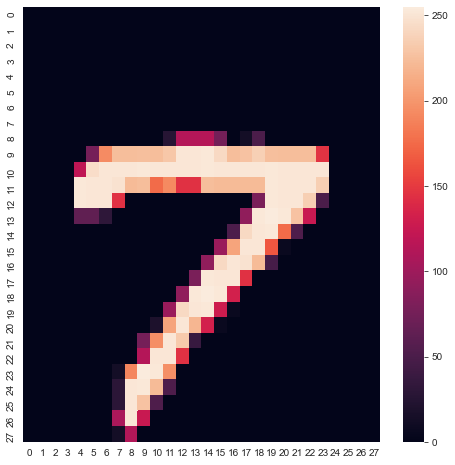

In [9]:
k = np.random.randint(0, len(data))
sns.heatmap(data[k].reshape(28, 28));

In [10]:
from sklearn.decomposition import PCA

In [11]:
%%time
pc = PCA(n_components=2)
pc.fit(data)
X_pc = pc.transform(data)

CPU times: user 5.84 s, sys: 300 ms, total: 6.14 s
Wall time: 1.21 s


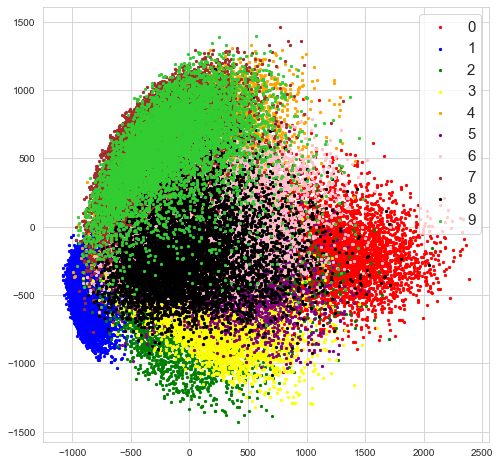

In [12]:
for i in range(10):
    plt.scatter(X_pc[target == i, 0], X_pc[target == i, 1], color=colors[i], s=5, label=i);
plt.legend(fontsize=15);

In [16]:
X_pc.shape

(70000, 2)

In [20]:
len(target)

70000

In [13]:
X_pc[target == i, 0]

array([-391.31726778, -787.74537111, -649.97932691, ..., -134.30064229,
         13.21646994,  341.05148983])

In [14]:
target

array([5, 0, 4, ..., 4, 5, 6])

In [22]:
from sklearn.manifold import TSNE

In [23]:
%%time
idxs = np.random.randint(0, len(data), size=3000)
X_ts = TSNE(n_components=2).fit_transform(data[idxs])

CPU times: user 2min 6s, sys: 3.53 s, total: 2min 9s
Wall time: 17.9 s


In [30]:
X_ts.shape

(3000, 2)

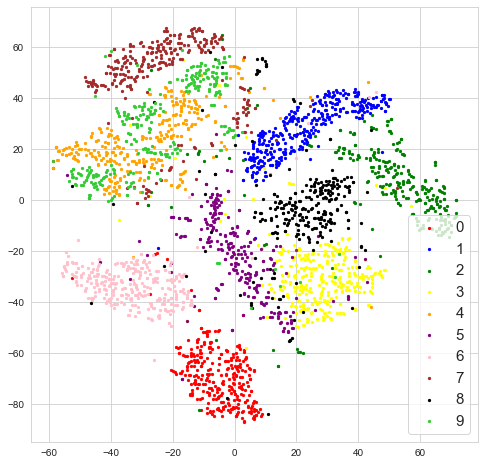

In [84]:
for i in range(10):
    plt.scatter(X_ts[target[idxs] == i, 0], X_ts[target[idxs] == i, 1], color=colors[i], s=5, label=i);
plt.legend(fontsize=15);

In [134]:
from sklearn.cluster import DBSCAN, MiniBatchKMeans

In [ ]:
all_colors = np.array(list(matplotlib.colors.cnames.keys()))

In [168]:
# cluster = MiniBatchKMeans(n_clusters=10, n_init=40)
cluster = DBSCAN(eps=2.5, min_samples=5)
cluster.fit(X_ts)
# cluster.fit(data[idxs])
unq_clusters = np.unique(cluster.labels_)
print(unq_clusters.shape)

(39,)


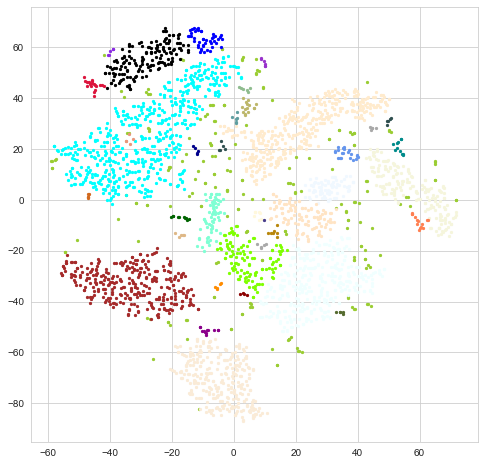

In [169]:
for i in unq_clusters:
    plt.scatter(X_ts[cluster.labels_ == i, 0], X_ts[cluster.labels_ == i, 1], s=5, 
                color=all_colors[i]);